# Tips for using colab Environment


## Click the following URL to load this notebook on Colab environment

* https://colab.research.google.com/github/ch6845/dynamic-cell-classifier/blob/master/3_DCC.ipynb

* You can use free GPUs from Google on Colab. (For more information, see https://colab.research.google.com/notebooks/welcome.ipynb)

## Enabling and testing the GPU
* Navigate to Edit→Notebook Settings
* select GPU from the Hardware Accelerator drop-down

## Load data
* Upload your data or, mount a storage to Colab virtual environment.
(For more information, see https://colab.research.google.com/notebooks/io.ipynb)

In [1]:
import datetime

import numpy as np
import pandas as pd

from scipy.io import mmread

import matplotlib.pyplot as plt

In [2]:
import os
os.__file__

'/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/os.py'

# load data

## expression data

In [3]:
exp_data=mmread('data/koh_extract/koh.data.counts.mm').toarray().astype(float)
with open('data/koh_extract/koh.data.col','r') as f: exp_data_col=[i.strip().strip('"') for i in f.read().split()]
with open('data/koh_extract/koh.data.row','r') as f: exp_data_row=[i.strip().strip('"') for i in f.read().split()]
assert exp_data.shape==(len(exp_data_row),len(exp_data_col))

In [4]:
assert len(set(exp_data_row))==len(exp_data_row)
assert len(set(exp_data_col))==len(exp_data_col)

In [5]:
exp_data,exp_data.shape

(array([[1.93134327e+04, 5.81785206e+04, 9.08678570e+03, ...,
         7.58501657e+04, 8.94289538e+04, 1.01937411e+05],
        [2.48547207e+04, 4.67361235e+04, 1.09620933e+04, ...,
         1.85699498e+04, 1.85806217e+04, 2.49668288e+04],
        [1.18570138e+04, 2.80836990e+04, 6.80287185e+03, ...,
         3.53701816e+04, 5.75775170e+04, 5.59807979e+04],
        ...,
        [4.83851544e+01, 1.19916350e+01, 6.96361343e+00, ...,
         4.88990717e+00, 8.49751588e+00, 7.80405857e+01],
        [2.35818377e+01, 4.26839000e+01, 1.80639917e+01, ...,
         7.54470439e+00, 2.84437127e+00, 8.88332407e+00],
        [6.10992450e+01, 2.59814157e+01, 2.45930809e+01, ...,
         4.85579286e-01, 0.00000000e+00, 0.00000000e+00]]), (4898, 446))

In [6]:
exp_data_row[:5],exp_data_col[:5]

(['ENSG00000198804',
  'ENSG00000210082',
  'ENSG00000198712',
  'ENSG00000198938',
  'ENSG00000198727'],
 ['SRR3952323', 'SRR3952325', 'SRR3952326', 'SRR3952327', 'SRR3952328'])

## cluster info 

In [7]:
exp_data_meta=pd.read_csv('data/koh_extract/koh.metadata.tsv',sep='\t')
exp_data_meta.head()

,Run,LibraryName,phenoid,libsize.drop,feature.drop,total_features,log10_total_features,total_counts,log10_total_counts,pct_counts_top_50_features,pct_counts_top_100_features,pct_counts_top_200_features,pct_counts_top_500_features,is_cell_control,celltype,tSNE_1,tSNE_2
SRR3952323,SRR3952323,H7hESC,H7hESC,False,False,4895,3.689841,2.248411e+06,6.351876,18.278965,25.975390,35.537616,52.410941,False,hESC,9.973465,19.045918
SRR3952325,SRR3952325,H7hESC,H7hESC,False,False,4887,3.689131,2.271617e+06,6.356335,24.672529,32.222803,41.547358,57.969233,False,hESC,10.366232,21.511833
SRR3952326,SRR3952326,H7hESC,H7hESC,False,False,4888,3.689220,5.846824e+05,5.766921,22.732839,30.205988,39.431308,55.285817,False,hESC,9.881356,19.317197
SRR3952327,SRR3952327,H7hESC,H7hESC,False,False,4879,3.688420,3.191810e+06,6.504037,20.867378,29.003904,38.785558,56.020859,False,hESC,8.483966,21.289459
SRR3952328,SRR3952328,H7hESC,H7hESC,False,False,4873,3.687886,2.190385e+06,6.340521,21.287923,29.423689,39.307683,56.640975,False,hESC,9.017168,20.637262


`clusterid_to_clustername` is used to convert integers in `res.0.8` to cell-type name

# Panglao

In [8]:
markers_db=pd.read_csv("data/PanglaoDB_markers_27_Mar_2020.tsv.gz",sep='\t')
markers_db=markers_db[markers_db['species'].str.contains('Hs')].drop(columns='species')
markers_db.head()

,official gene symbol,cell type,nicknames,ubiquitousness index,product description,gene type,canonical marker,germ layer,organ,sensitivity_human,sensitivity_mouse,specificity_human,specificity_mouse
0,CTRB1,Acinar cells,CTRB,0.017,chymotrypsinogen B1,protein-coding gene,1.0,Endoderm,Pancreas,1.000000,0.957143,0.000629,0.015920
1,KLK1,Acinar cells,Klk6,0.013,kallikrein 1,protein-coding gene,1.0,Endoderm,Pancreas,0.833333,0.314286,0.005031,0.012826
2,RBPJL,Acinar cells,RBP-L|SUHL|RBPSUHL,0.001,recombination signal binding protein for immun...,protein-coding gene,1.0,Endoderm,Pancreas,0.000000,0.000000,0.000000,0.000000
3,PTF1A,Acinar cells,PTF1-p48|bHLHa29,0.001,pancreas associated transcription factor 1a,protein-coding gene,1.0,Endoderm,Pancreas,0.000000,0.157143,0.000629,0.000773
5,CELA3A,Acinar cells,ELA3|ELA3A,0.001,chymotrypsin like elastase family member 3A,protein-coding gene,1.0,Endoderm,Pancreas,0.833333,0.128571,0.000000,0.000000


In [9]:
#markers_db[(markers_db['official gene symbol']=='FXDY2') |(markers_db['nicknames'].str.contains('FXDY2'))],'FXDY2' in exp_data_row

## Marker info

In [10]:
clustername_to_markers=pd.read_csv('data/koh_extract/koh.rho.tsv',sep='\t').T

In [11]:
clustername_to_markers

,ENSG00000008311,ENSG00000018625,ENSG00000019549,ENSG00000026025,ENSG00000039068,ENSG00000042493,ENSG00000053438,ENSG00000075340,ENSG00000079102,ENSG00000092068,...,ENSG00000240563,ENSG00000241186,ENSG00000243004,ENSG00000249532,ENSG00000250305,ENSG00000254277,ENSG00000254339,ENSG00000260342,ENSG00000260834,ENSG00000280623
hESC,1,1,0,0,1,1,0,1,1,1,...,1,1,1,1,0,1,1,1,1,0
APS,0,0,1,0,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,0
MPS,0,0,1,0,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
DLL1pPXM,0,1,1,1,1,1,0,1,0,1,...,0,0,1,0,1,0,0,1,1,0
ESMT,0,1,1,1,1,1,1,1,1,1,...,0,0,1,0,1,0,0,1,1,0
Sclrtm,0,1,1,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
D5CntrlDrmmtm,0,1,1,1,0,1,0,1,1,1,...,0,0,0,0,1,0,0,1,1,0
D2LtM,0,1,1,1,1,1,0,1,1,1,...,0,0,1,0,1,0,0,1,1,0


In [12]:
len(clustername_to_markers.loc[['Sclrtm','D5CntrlDrmmtm']].T.iloc[:,1][clustername_to_markers.loc[['Sclrtm','D5CntrlDrmmtm']].T.iloc[:,1]==1].index.intersection(
    clustername_to_markers.loc[['Sclrtm','D5CntrlDrmmtm']].T.iloc[:,0][clustername_to_markers.loc[['Sclrtm','D5CntrlDrmmtm']].T.iloc[:,0]==1].index
)),len(clustername_to_markers.loc[['Sclrtm','D5CntrlDrmmtm']].T.iloc[:,1][clustername_to_markers.loc[['Sclrtm','D5CntrlDrmmtm']].T.iloc[:,1]==1].index)

(27, 50)

In [13]:
clustername_unique=list(clustername_to_markers.index)
exp_data_meta_clusterid_clusteridunique=exp_data_meta['celltype'].apply(lambda x: clustername_unique.index(x))

In [14]:
marker_unique=list(clustername_to_markers.columns)
marker_unique_exp_data_idx=[exp_data_row.index(marker) for marker in marker_unique]

In [15]:
pi_true=np.array([np.sum(exp_data_meta_clusterid_clusteridunique==i) for i in sorted(np.unique(exp_data_meta_clusterid_clusteridunique))])/exp_data_meta_clusterid_clusteridunique.shape[0]
M_true=np.array([np.mean(exp_data[marker_unique_exp_data_idx,:][:,exp_data_meta_clusterid_clusteridunique==i],axis=1) for i in sorted(np.unique(exp_data_meta_clusterid_clusteridunique))])

In [16]:
cell_size_factor=pd.read_csv('data/analysis/koh.size_factor_cluster.tsv',sep='\t',header=None)[0].values.astype(float)#.reshape(-1,1)
#cell_size_factor=np.ones_like(cell_size_factor)
cell_size_factor.shape

(446,)

In [17]:
Y=exp_data[marker_unique_exp_data_idx].transpose().astype(float)
Y.shape

(446, 84)

In [18]:
#marker_onehot=np.array([np.sum(np.eye(len(marker_unique))[[marker_unique.tolist().index(marker) for marker in value]],axis=0) for key,value in clustername_to_markers.items()])
#marker_onehot.shape
#marker_onehot.T
marker_onehot=clustername_to_markers

In [19]:
#exp_data_col_patient=pd.Series(exp_data_col).str.slice(start=1,stop=2).astype(int).values
#x_data_covariate=np.eye(len(np.unique(exp_data_col_patient)))[exp_data_col_patient-1]
x_data_intercept=np.array([np.ones(Y.shape[0])]).transpose()
x_data_null=np.concatenate([x_data_intercept],axis=1)
x_data_null.shape

(446, 1)

# Torch porting

In [20]:
# Asuume that the following variables are initialized

# Input
Y
s=cell_size_factor
#X=x_data_null.copy()[:,[0, 1,2,3,4]]
#X=x_data_null.copy()[:,[0, 1,2]]
#X=x_data_null.copy()[:,[0,1,2,3]]
X=x_data_null.copy()[:,[0]]
# 234 x
# 34 x
# 123 x
rho=marker_onehot.values

delta_min=2
B=10
LR=1e-1

# Optional
EM_ITER_MAX=20
M_ITER_MAX=10000

BATCH_SIZE=Y.shape[0]
NUM_WORKERS=0

LOWER_BOUND=1e-10
THETA_LOWER_BOUND=1e-20


Q_diff_tolerance=1e-4
LL_diff_tolerance=1e-4
X.shape

(446, 1)

In [21]:
import math
import numpy as np

import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
from torch.nn.parameter import Parameter

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [22]:
torch.set_default_dtype(torch.float64) 

In [23]:
device_cpu=torch.device("cpu")
device_cuda_list=[torch.device("cuda:{}".format(i)) for i in range(6)][::-1]

In [24]:
#from basic_tools import Cell_Dataset,Masked
class Masked_Function(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input, mask):
        #print('aaaa')
        output=input
        ctx.save_for_backward(input, mask)
        return output

    @staticmethod
    def backward(ctx, grad_output):
        input, mask = ctx.saved_tensors
        grad_input = grad_mask = None
        if ctx.needs_input_grad[0]:
            grad_input = grad_output.mul(mask)

        return grad_input, grad_mask
    
class Masked(nn.Module):    
    def __init__(self, mask):    
        super(Masked, self).__init__()
        
        self.mask = nn.Parameter(torch.Tensor(mask)==1, requires_grad=False)    
        
        
    def forward(self, input):
        return Masked_Function.apply(input, self.mask)

    def extra_repr(self):
        return 'mask={}'.format(self.mask.shape)  

In [25]:
import math
class NB_logprob(nn.Module):
    def __init__(self):
        super(NB_logprob,self).__init__()
        
    def forward(self,total_count,probs,value):
        
        #eps = torch.finfo(probs.dtype).eps
        #probs_clamped=probs.clamp(min=eps, max=1 - eps)        
        probs_clamped=probs
        logits=torch.log(probs_clamped) - torch.log1p(-probs_clamped)
        #logits=torch.log(probs_clamped)
        
        log_unnormalized_prob = (total_count * F.logsigmoid(-logits) +
                                 value * F.logsigmoid(logits))
        log_normalization = (-torch.lgamma(total_count + value) + torch.lgamma(1. + value) +
                             torch.lgamma(total_count))

        return log_unnormalized_prob - log_normalization
    
class Normal_logprob(nn.Module):
    def __init__(self):
        super(Normal_logprob,self).__init__()
        
    def forward(self,loc,scale,value):
    
        var = (scale ** 2)
        log_scale = torch.log(scale)
        
        
        #print(loc.shape,scale.shape,value.shape)
        return -((value - loc) ** 2) / (2 * var) - log_scale - math.log(math.sqrt(2 * math.pi))    
        #return log_scale
        
class Poisson_logprob(nn.Module):
    def __init__(self):
        super(Poisson_logprob,self).__init__()
        
    def forward(self,rate,value):
        #rate=rate.clamp(min=1e-3)+(-1)/rate.clamp(max=-1e-5)
        
        return (rate.log() * value) - rate - (value + 1).lgamma()
    
class Dirichlet_logprob(nn.Module):
    def __init__(self):
        super(Dirichlet_logprob,self).__init__()
        
    def forward(self,concentration,value):
        
        return ((torch.log(value) * (concentration - 1.0)).sum(-1) +
                torch.lgamma(concentration.sum(-1)) -
                torch.lgamma(concentration).sum(-1))
    
        
NB_logprob=NB_logprob()        
normal_logprob=Normal_logprob()
poisson_logprob=Poisson_logprob()
dirichlet_logprob=Dirichlet_logprob()

In [26]:
class Cell_Dataset(Dataset):
    def __init__(self,Y,X,s):
        self.Y=Y
        self.X=X
        self.s=s
        
    def __len__(self):
        return self.Y.shape[0]
    
    def __getitem__(self,idx):
        item= {"Y":self.Y[idx,:],"X":self.X[idx,:],"s":self.s[idx]}
        return item  

In [27]:
def run_EM():
    global gamma_new,Q_new,LL_new
    
    print('Start time:',datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
    
    with torch.no_grad():
        for batch_idx,batch in enumerate(cell_dataloader):
            batch_Y=batch['Y'].to(device)
            batch_X=batch['X'].to(device)
            batch_s=batch['s'].to(device)    
        gamma_fixed,_,LL_old=model(batch_Y,batch_X,batch_s,gamma_fixed=None,mode='LL')
        _,Q_old,_=model(batch_Y,batch_X,batch_s,gamma_fixed=gamma_fixed,mode='M')

    print(LL_old)
    print(Q_old)

    for em_idx in range(EM_ITER_MAX):#
        #optimizer = optim.Adam(model.parameters(),lr=0.1,eps=1e-3,betas=(0.9,0.999))
        LL_new=torch.zeros_like(LL_old)
        #optimizer = optim.Adam(model.parameters(),lr=LR)
        for batch_idx,batch in enumerate(cell_dataloader):
            # It is usually just one iteration(batch).
            # However, developer of cellAssign may have done this for extreme situation of larse sample size
            batch_Y=batch['Y'].to(device)
            batch_X=batch['X'].to(device)
            batch_s=batch['s'].to(device)

            #############
            #E-step
            ######### ####
            with torch.no_grad():
                gamma_new,_,_=model(batch_Y,batch_X,batch_s,gamma_fixed=None,mode='E')

            #############
            #M-step
            #############
            for m_idx in range(M_ITER_MAX):#
            #for m_idx in range(20):#    
                optimizer.zero_grad()
                _,Q_new,_=model(batch_Y,batch_X,batch_s,gamma_fixed=gamma_new,mode='M')
                Q_new.backward()
                optimizer.step()
                
                #Constraint
                model.delta_log.data=model.delta_log.data.clamp(min=model.delta_log_min)
                model.NB_basis_a.data=model.NB_basis_a.data.clamp(min=0)

                if m_idx%20==0:
                    #print(sorted(model.delta_log.cpu().detach().numpy().flatten())[-10:])
                    Q_diff=(Q_old-Q_new)/torch.abs(Q_old)
                    Q_old=Q_new
                    print('M: {}, Q: {} Q_diff: {}'.format(m_idx,Q_new,Q_diff))    
                    if m_idx>0 and torch.abs(Q_diff)<Q_diff_tolerance:
                        print('M break')
                        break                
            #############
            #Look at LL
            #############
            with torch.no_grad():
                _,_,LL_temp=model(batch_Y,batch_X,batch_s,gamma_fixed=None,mode='LL')
                LL_new+=LL_temp

        LL_diff=(LL_new-LL_old)/torch.abs(LL_old)
        LL_old=LL_new
        print('EM: {}, LL: {} LL_diff: {}'.format(em_idx,LL_new,LL_diff))
        if LL_diff<LL_diff_tolerance:
            print('EM break')
            break
    print('End time:',datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))    
    return gamma_new,Q_new,LL_new

In [54]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.distributions.negative_binomial import NegativeBinomial
from torch.distributions.normal import Normal
from torch.distributions.dirichlet import Dirichlet

class Custom_Model(nn.Module):
    def __init__(self,Y,rho,X_col=5,delta_min=2,LOWER_BOUND=1e-10,THETA_LOWER_BOUND=1e-20):
        # Y,rho are needed for model parameter initialization
        super(Custom_Model, self).__init__()
        
        #rho
        self.masked=Masked(rho)
         
        #delta
        self.delta_log_min=np.log(delta_min) #
        self.delta_log=nn.Parameter(torch.Tensor(np.random.uniform(-2,2,size=rho.shape)),requires_grad=True) # (C,G)
        self.delta_log.data=self.delta_log.data.clamp(min=self.delta_log_min)

        #delta prior
        self.delta_log_mean=nn.Parameter(0*torch.ones(1),requires_grad=True)        
        self.delta_log_variance=nn.Parameter(1*torch.ones(1),requires_grad=True)           
        
        #beta
        Y_colmean=np.mean(Y,axis=0)
        beta_init=np.hstack([((Y_colmean-Y_colmean.mean())/np.std(Y_colmean)).reshape(-1,1),\
                     np.zeros((Y.shape[1],X_col-1))]).T
        self.beta=nn.Parameter(torch.Tensor(beta_init),requires_grad=True) # (P,G)
        
        #print(((np.mean(Y,axis=0)-np.mean(Y))/np.std(np.mean(Y,axis=0))).reshape(-1,1))
        #print(self.beta)
        
        #NB parameters
        self.NB_basis_mean=nn.Parameter(torch.Tensor(np.linspace(np.min(Y),np.max(Y),B)), requires_grad=False)
        self.NB_basis_a=nn.Parameter(torch.ones(B),requires_grad=True) # not consistent with paper.. hmm. strange...
        self.NB_basis_b=nn.Parameter((1/(2*((np.max(Y)-np.min(Y))/(B-1))**2))*torch.ones(B),requires_grad=False) # hmm... strange
        
        #theta
        self.theta_logit=nn.Parameter(torch.Tensor(np.random.normal(loc=0.,scale=1.,size=rho.shape[0])),requires_grad=True)
        
        # lower bounds
        self.LOWER_BOUND=LOWER_BOUND
        self.THETA_LOWER_BOUND=THETA_LOWER_BOUND
        
    def forward(self,Y,X,s,gamma_fixed=None,mode='E'):
        delta_log_masked=self.masked(self.delta_log) #(C,G)
        delta=torch.exp(delta_log_masked)*self.masked.mask
        
        X_beta_s=X.matmul(self.beta)+torch.log(s.view(-1, 1)) #(N,P)*(P,G) + (N,1) = (N,G)
        
        mu_log=X_beta_s.unsqueeze(dim=1).repeat(1,delta.shape[0],1)+delta #(N,1,G)+(C,G) = (N,C,G)
        
        mu=torch.exp(mu_log) # (N,C,G)
        
        #Y_extend=Y.view(Y.shape[0],1,Y.shape[1]).repeat(1,mu_log.shape[1],1) # (N,C,G)
        Y_extend=Y.unsqueeze(dim=1).repeat(1,mu_log.shape[1],1)
        
        # Negative Binomial
        phi_B=self.NB_basis_a*torch.exp(-self.NB_basis_b*(mu_log.unsqueeze(dim=3).repeat(1,1,1,B)-self.NB_basis_mean)**2) # (N,C,G,B)
        phi=torch.sum(phi_B,axis=3)+self.LOWER_BOUND
        Y_logprob=NB_logprob(total_count=phi,probs=(mu/(mu+phi)),value=Y_extend) # (N,C,G)
        
        # Normal
        #Y_logprob=normal_logprob(loc=mu_log,scale=torch.ones(1).to(device),value=Y_extend) # (N,C,G)
        
        # Poisson
        #Y_logprob=poisson_logprob(rate=mu,value=Y_extend) # (N,C,G)

        theta_log=F.log_softmax(self.theta_logit,dim=0) # (C)          
        Y_logprob_reduce=torch.sum(Y_logprob,axis=2)+theta_log # (N,C)
        
        Y_logprob_reduce_reduce=torch.logsumexp(Y_logprob_reduce,dim=1).view(-1,1) # (N,1)
        
        gamma=torch.exp(Y_logprob_reduce-Y_logprob_reduce_reduce) # (N,C)

        if mode=='E':
            return gamma,None,None
        elif mode=='M' or mode=='LL':
            theta_log_prob=dirichlet_logprob(concentration=1e-2*torch.ones_like(theta_log),value=(torch.exp(theta_log)+self.THETA_LOWER_BOUND))
            #print(1e-2*torch.ones_like(theta_log))
            delta_log_prob=torch.sum(normal_logprob(loc=self.delta_log_mean*self.masked.mask,scale=self.delta_log_variance,value=delta_log_masked))            
            if mode=='M':
                Q=-torch.sum(gamma_fixed*Y_logprob_reduce) # (N,C) (N,C)
                #Q=Q-theta_log_prob
                #Q=Q-delta_log_prob
                return gamma,Q,None
            elif mode=='LL':      
                LL=torch.sum(Y_logprob_reduce_reduce) # product of likelihood(y_i)-> (1) 
                #print(LL,theta_log_prob,delta_log_prob)
                #LL=LL+theta_log_prob
                #LL=LL+delta_log_prob
                return gamma,None,LL
        else:
            raise          

In [29]:
cell_dataset=Cell_Dataset(Y,X,s)
cell_dataloader=DataLoader(dataset=cell_dataset,shuffle=False,batch_size=BATCH_SIZE,num_workers=NUM_WORKERS)

In [34]:
device=device_cuda_list[0]#
model=Custom_Model(Y,rho,X_col=X.shape[1],delta_min=delta_min,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)
optimizer = optim.Adam(model.parameters(),lr=LR)#,betas=(0.92, 0.999))

In [55]:
device=device_cuda_list[0]#
model=Custom_Model(Y,np.ones_like(rho).repeat(2,axis=0),X_col=X.shape[1],delta_min=0,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)
optimizer = optim.Adam(model.parameters(),lr=LR)#,betas=(0.92, 0.999))

/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


In [147]:
device=device_cuda_list[0]#
model=Custom_Model(Y,np.ones_like(rho),X_col=X.shape[1],delta_min=0,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)
optimizer = optim.Adam(model.parameters(),lr=LR)#,betas=(0.92, 0.999))

/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


In [42]:
device=device_cuda_list[0]#
model=Custom_Model(Y,np.ones_like(rho),X_col=X.shape[1],delta_min=0,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)
optimizer = optim.Adam(model.parameters(),lr=LR)#,betas=(0.92, 0.999))

/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


In [56]:
gamma_value,Q_value,LL_value=run_EM()

Start time: 2020-05-19 20:41:31
tensor(-2176720.6233, device='cuda:5')
tensor(2176724.0156, device='cuda:5')
M: 0, Q: 2176724.015596189 Q_diff: 0.0
M: 20, Q: 261719.15944922547 Q_diff: 0.8797646566243528
M: 40, Q: 221830.24030287573 Q_diff: 0.15241115411761952
M: 60, Q: 217379.86113050522 Q_diff: 0.020062094177485387
M: 80, Q: 216690.45625757898 Q_diff: 0.003171429355695259
M: 100, Q: 216599.98369824994 Q_diff: 0.00041751981555427004
M: 120, Q: 216585.94866984492 Q_diff: 6.479699658968753e-05
M break
EM: 0, LL: -212640.09760796608 LL_diff: 0.9023117182206907
M: 0, Q: 212700.1008639728 Q_diff: 0.017941366140033194
M: 20, Q: 209571.40810417186 Q_diff: 0.014709408914675669
M: 40, Q: 209297.31577850133 Q_diff: 0.001307870802367682
M: 60, Q: 209236.99453612493 Q_diff: 0.0002882083898306802
M: 80, Q: 209214.94538117893 Q_diff: 0.00010537885518228303
M: 100, Q: 209202.56035999296 Q_diff: 5.919759299892843e-05
M break
EM: 1, LL: -207968.9469258414 LL_diff: 0.02196740283075234
M: 0, Q: 208004.8

In [44]:
sum(np.argmax(gamma_new.cpu().numpy(),axis=1)==exp_data_meta_clusterid_clusteridunique.values),\

(53,)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4,
       4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 6, 6, 5, 2, 5, 2, 5, 7, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5,

In [114]:
[np.sum(plot_value[exp_data_meta_clusterid_clusteridunique==i]!=exp_data_meta_clusterid_clusteridunique[exp_data_meta_clusterid_clusteridunique==i]) for i in np.unique(exp_data_meta_clusterid_clusteridunique.values)]

[0, 0, 1, 0, 0, 6, 1, 0]

In [115]:
pd.DataFrame([0, 0, 1, 0, 0, 6, 1, 0],marker_onehot.index)

,0
hESC,0
APS,0
MPS,1
DLL1pPXM,0
ESMT,0
Sclrtm,6
D5CntrlDrmmtm,1
D2LtM,0


In [100]:
marker_onehot.index

Index(['hESC', 'APS', 'MPS', 'DLL1pPXM', 'ESMT', 'Sclrtm', 'D5CntrlDrmmtm',
       'D2LtM'],
      dtype='object')

In [61]:
gamma_new.shape

torch.Size([446, 8])

In [62]:
delta_min

2

In [48]:
plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams["font.size"] = 15
plt.rcParams['font.family']='Arial'


plot_value=exp_data_meta_clusterid_clusteridunique.values

sns.scatterplot(x="tSNE_1", y="tSNE_2",hue=plot_value,style=np.array((list(range(0,2))*30))[plot_value],
                data=exp_data_meta,s=40,palette=plt.cm.rainbow)#,linewidth=0.3)

NameError: name 'sns' is not defined

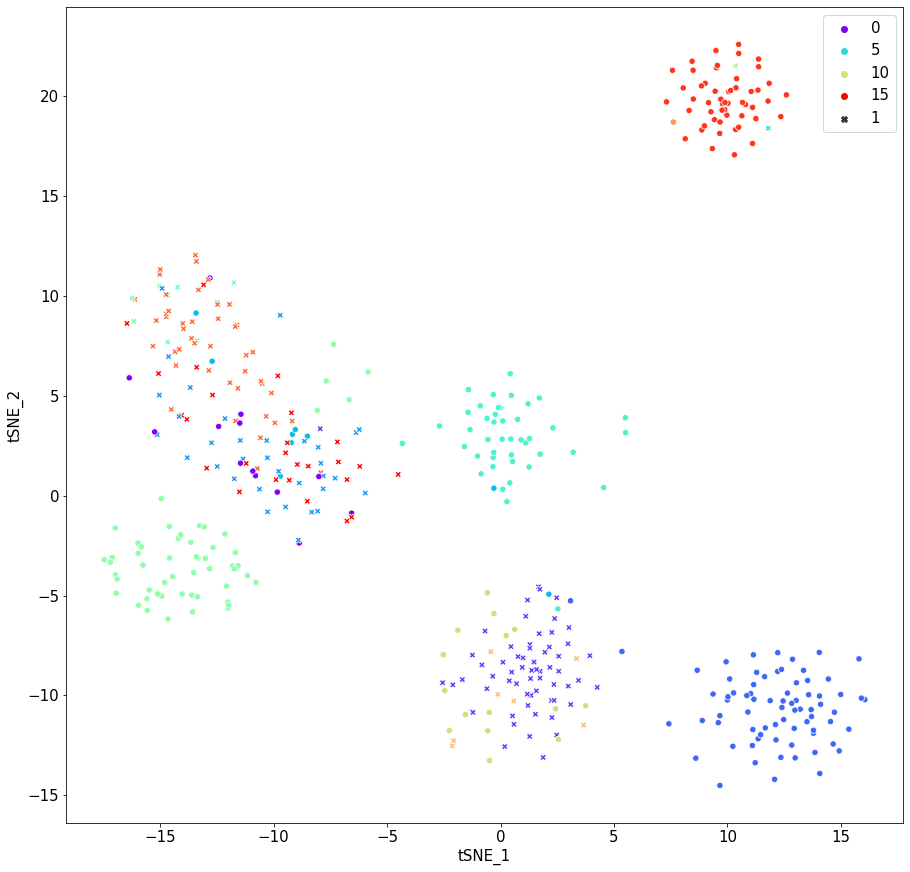

In [53]:
import seaborn as sns

plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams["font.size"] = 15
plt.rcParams['font.family']='Arial'


plot_value=np.argmax(gamma_new.cpu().numpy(),axis=1)

sns.scatterplot(x="tSNE_1", y="tSNE_2",hue=plot_value,style=np.array((list(range(0,2))*30))[plot_value],
                data=exp_data_meta,s=40,palette=plt.cm.rainbow)#,linewidth=0.3)

In [38]:
exp_data_meta

,Run,LibraryName,phenoid,libsize.drop,feature.drop,total_features,log10_total_features,total_counts,log10_total_counts,pct_counts_top_50_features,pct_counts_top_100_features,pct_counts_top_200_features,pct_counts_top_500_features,is_cell_control,celltype
SRR3952323,SRR3952323,H7hESC,H7hESC,False,False,4895,3.689841,2.248411e+06,6.351876,18.278965,25.975390,35.537616,52.410941,False,hESC
SRR3952325,SRR3952325,H7hESC,H7hESC,False,False,4887,3.689131,2.271617e+06,6.356335,24.672529,32.222803,41.547358,57.969233,False,hESC
SRR3952326,SRR3952326,H7hESC,H7hESC,False,False,4888,3.689220,5.846824e+05,5.766921,22.732839,30.205988,39.431308,55.285817,False,hESC
SRR3952327,SRR3952327,H7hESC,H7hESC,False,False,4879,3.688420,3.191810e+06,6.504037,20.867378,29.003904,38.785558,56.020859,False,hESC
SRR3952328,SRR3952328,H7hESC,H7hESC,False,False,4873,3.687886,2.190385e+06,6.340521,21.287923,29.423689,39.307683,56.640975,False,hESC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR3952828,SRR3952828,H7_derived_D2LtM,H7_derived_D2LtM,False,False,4513,3.654562,1.247989e+06,6.096211,58.128691,63.089063,69.786209,81.225415,False,D2LtM
SRR3952829,SRR3952829,H7_derived_D2LtM,H7_derived_D2LtM,False,False,4576,3.660581,1.261448e+06,6.100870,35.268612,42.447868,51.899014,68.902894,False,D2LtM
SRR3952830,SRR3952830,H7_derived_D2LtM,H7_derived_D2LtM,False,False,4604,3.663230,1.139445e+06,6.056694,31.668595,39.265288,48.868266,65.443904,False,D2LtM
SRR3952831,SRR3952831,H7_derived_D2LtM,H7_derived_D2LtM,False,False,4534,3.656577,1.041630e+06,6.017714,41.217445,48.086951,57.091500,72.837642,False,D2LtM


In [32]:
device=device_cuda_list[0]#
model=Custom_Model(Y,rho,X_col=X.shape[1],delta_min=0,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)
optimizer = optim.Adam(model.parameters(),lr=LR)#,betas=(0.92, 0.999))

/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


In [595]:
device=device_cuda_list[0]#
model=Custom_Model(Y,rho,X_col=X.shape[1],delta_min=0,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)
optimizer = optim.Adagrad(model.parameters(),lr=LR)#,betas=(0.92, 0.999))

/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


In [580]:
device=device_cuda_list[0]#
model=Custom_Model(Y,rho,X_col=X.shape[1],delta_min=0,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)
optimizer = optim.RMSprop(model.parameters(),lr=LR)#,betas=(0.92, 0.999))

/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


In [469]:
pi_true=np.array([np.sum(exp_data_meta_clusterid_clusteridunique==i) for i in sorted(np.unique(exp_data_meta_clusterid_clusteridunique))])/exp_data_meta_clusterid_clusteridunique.shape[0]
M_true=np.array([np.mean(exp_data[marker_unique_exp_data_idx,:][:,exp_data_meta_clusterid_clusteridunique==i],axis=1) for i in sorted(np.unique(exp_data_meta_clusterid_clusteridunique))])

In [470]:
M_true.shape,M_get.shape

((8, 84), (8, 84))

In [516]:
model.delta_log_min

-inf

In [ ]:
#M_true.shape,
from scipy.stats import pearsonr
for i in range(M_get.shape[0]):
    for j in range(M_true.shape[0]):
        print(pearsonr(M_get[i],M_true[j]))
    print('--------------')

In [631]:
device=device_cuda_list[0]#
model=Custom_Model(Y,rho,X_col=X.shape[1],delta_min=0,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)
optimizer = optim.Adagrad(model.parameters(),lr=LR)#,betas=(0.92, 0.999))

/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


In [633]:
#M_true.shape,
from scipy.stats import pearsonr
M_get=np.array([np.mean(exp_data[marker_unique_exp_data_idx,:][:,np.argmax(gamma_new.cpu().numpy(),axis=1)==i],axis=1) for i in sorted(np.unique(np.argmax(gamma_new.cpu().numpy(),axis=1)))])
type_mapping=[np.argmin([pearsonr(M_get[i],M_true[j])[1] for j in range(M_true.shape[0])]) for i in range(M_get.shape[0])]
    sum(pd.Series(type_mapping)[np.argmax(gamma_value.cpu().numpy(),axis=1)].values==exp_data_meta_clusterid_clusteridunique.values)

In [637]:
type_mapping

[2, 3, 6, 5, 7, 4, 0, 1]

(9,)

In [635]:
(model.delta_log.exp()[model.masked.mask]).flatten().min()

tensor(0.4523, device='cuda:5', grad_fn=<MinBackward1>)

In [636]:
sum(pd.Series(type_mapping)[np.argmax(gamma_value.cpu().numpy(),axis=1)].values==exp_data_meta_clusterid_clusteridunique.values)
#368 414 393 371 400

417

In [534]:
#row: output
#col: true

pd.DataFrame([[pearsonr(M_get[i],M_true[j])[0] for j in range(M_true.shape[0])] for i in range(M_get.shape[0])])

,0,1,2,3,4,5,6,7
0,0.288542,0.898268,0.861688,0.198212,0.044783,-0.145175,-0.075893,0.299939
1,0.113939,0.143416,0.387294,0.218115,0.096983,0.273648,0.280032,0.999702
2,0.015470,-0.158295,-0.131328,0.249697,0.123373,0.992664,0.583108,0.271924
3,-0.053186,0.237892,0.073370,0.999959,0.446114,0.241037,0.539390,0.215287
4,1.000000,0.286151,0.212456,-0.054024,0.029250,0.051551,-0.061142,0.117788
5,0.210160,-0.091258,-0.076202,0.375318,0.193390,0.863894,0.629216,0.334737
6,-0.034658,-0.049097,-0.078579,0.609863,0.730898,0.447194,0.879919,0.241905
7,0.020569,-0.064771,0.004476,0.406141,0.273469,0.584965,0.775367,0.471117


In [584]:
np.unique(np.argmax(gamma_new.cpu().numpy(),axis=1),return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]), array([51, 55, 17, 83, 44, 74, 50, 72]))

In [598]:
type_mapping

[4, 6, 5, 0, 1, 7, 7, 3]

In [ ]:
399

In [ ]:
pear

In [380]:
model.delta_log_min

0.6931471805599453

In [ ]:
gamma_value,Q_value,LL_value=run_EM()

In [382]:
delta_min
#total 446
#delta_min=2 423, 420, 425, 360, 418, 422, 415, 424, 416
#delta_min=-inf 413,  412,  350, 415, 344
#rho free delta_min=-inf 138
#rho free delta_min=2 10

2

In [383]:
# 어차피 tsne로 해도 사람이 manual하게 하는 점을 고려할 때
# noisy하여 NB로

# sub type정도
# marker extension

# panglao DB

# DEG analysis, NB
# NB에 안 맞더라도 단순한 DEG

#normalized된 단순 상대적 크기 (NB와 따르냐는 상관없이)

#probabilistic한 cell type 분류가 거의 cellassign이 유일한데, probabilistic 한 과정을 빠르게 할 수 있다.


In [384]:
model.delta_log_min

0.6931471805599453

In [458]:
sum(np.argmax(gamma_new.cpu().numpy(),axis=1)==exp_data_meta_clusterid_clusteridunique.values),\

(174,)

In [368]:
np.unique(exp_data_meta_clusterid_clusteridunique.values,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]), array([55, 62, 22, 74, 43, 68, 67, 55]))

In [49]:
model=Custom_Model(Y,rho,X_col=X.shape[1],delta_min=delta_min,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)

/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


In [50]:
[cell_dataset[:]['Y'].shape,cell_dataset[:]['X'].size,cell_dataset[:]['s'].size]

[(446, 84), 446, 446]

In [51]:
summary?

Object `summary` not found.


In [52]:
device

device(type='cuda', index=5)

In [ ]:
from torchsummary import summary
summary(model,input_size=[cell_dataset[:]['Y'].shape,cell_dataset[:]['X'].shape,cell_dataset[:]['s'].shape],device='cuda')

In [31]:
for name,param in model.named_parameters():
    print(name,param.size())

delta_log torch.Size([12, 63])
delta_log_mean torch.Size([1])
delta_log_variance torch.Size([1])
beta torch.Size([4, 63])
NB_basis_mean torch.Size([10])
NB_basis_a torch.Size([10])
NB_basis_b torch.Size([10])
theta_logit torch.Size([12])
masked.mask torch.Size([12, 63])


In [48]:
for batch_idx,batch in enumerate(cell_dataloader):
    # It is usually just one iteration(batch).
    # However, developer of cellAssign may have done this for extreme situation of larse sample size
    batch_Y=batch['Y'].to(device)
    batch_X=batch['X'].to(device)
    batch_s=batch['s'].to(device)

In [32]:
# Total 8444 cells
#NB              7640 LL: -271628 90sec 9iters
#NB(old markers) 7362 LL: -241538 90sec 13iters
#Poisson         7300 LL: -1116555 40sec 9iters 
#Normal          3369  LL: -783656280 doesn't_converge
#

In [109]:
(model.delta_log.exp()[model.masked.mask]).flatten().min()

tensor(0.1470, device='cuda:5', grad_fn=<MinBackward1>)

In [85]:
sum(np.argmax(gamma_new.cpu().numpy(),axis=1)==exp_data_meta_clusterid_clusteridunique.values),\

(350,)

In [86]:
len(exp_data_meta_clusterid_clusteridunique)

446

In [91]:
7600/8444,350/446

(0.9000473709142587, 0.7847533632286996)

In [54]:
#model.delta_log_min
exp_data_col_patient

array([1, 1, 1, ..., 5, 5, 5])

In [82]:
pd.DataFrame(np.array(np.unique(exp_data_meta_clusterid_clusteridunique.values[exp_data_col_patient==3],return_counts=True)))

,0,1,2,3,4,5,6,7,8
0,0,2,3,4,5,6,7,9,10
1,41,2621,156,24,244,2,1,29,9


In [84]:
#pd.DataFrame([np.unique(exp_data_meta_clusterid_clusteridunique.values[exp_data_col_patient==i],return_counts=True) for i in range(1,6)]).T
pd.concat([pd.DataFrame(np.array(np.unique(exp_data_meta_clusterid_clusteridunique.values[exp_data_col_patient==i],return_counts=True))).T.set_index(0) for i in range(1,6)],axis=1).fillna(0).astype(int)

,1,1,1,1,1
0,,,,,
0,8,23,41,13,34
1,7,7,0,34,81
2,96,629,2621,43,112
3,212,85,156,151,240
4,8,0,24,2,3
5,283,123,244,294,248
6,275,1,2,305,378
7,82,5,1,192,289
8,92,0,0,199,197


In [ ]:
#1,2 7607
# 7639
#1,2,4 7663
# 4485

#3 7600개
#2 7600개
#0  (1이상)

In [33]:
full0=pd.read_csv('data/analysis/cellassign_fit.prob.tsv',sep='\t').values#.idxmax(axis=1)#.value_counts()
full1=pd.read_csv('data/analysis/cellassign_fit_full.prob.tsv',sep='\t').values#.idxmax(axis=1)#.value_counts()
full2=pd.read_csv('data/analysis/cellassign_fit_full2.prob.tsv',sep='\t').values#.idxmax(axis=1)#.value_counts()
full3=pd.read_csv('data/analysis/cellassign_fit_full3.prob.tsv',sep='\t').values#.idxmax(axis=1)#.value_counts()

In [34]:
sum(np.argmax(full0,axis=1)==exp_data_meta_clusterid_clusteridunique.values),\
sum(np.argmax(full1,axis=1)==exp_data_meta_clusterid_clusteridunique.values),\
sum(np.argmax(full2,axis=1)==exp_data_meta_clusterid_clusteridunique.values),\
sum(np.argmax(full3,axis=1)==exp_data_meta_clusterid_clusteridunique.values),\
sum(np.argmax(test3,axis=1)==exp_data_meta_clusterid_clusteridunique.values),\
sum(np.argmax(gamma_new.cpu().numpy(),axis=1)==exp_data_meta_clusterid_clusteridunique.values),\

NameError: name 'test3' is not defined

In [ ]:
np.unique(exp_data_meta_clusterid_clusteridunique.values,return_counts=True)

In [35]:
np.unique(np.argmax(gamma_value.cpu().numpy(),axis=1),return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([ 125,  115, 3558,  741,   50, 1177,  602,  750,  664,  539,  121,
           2]))

In [36]:
dict(model.named_parameters())

{'delta_log': Parameter containing:
 tensor([[0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931,
          0.9312, 0.6931, 0.6931, 1.4206, 1.5949, 0.6931, 0.6931, 0.6931, 0.6931,
          1.6822, 1.9177, 1.8566, 0.6931, 0.6931, 0.6931, 1.5274, 0.6931, 1.6235,
          1.5616, 1.5839, 1.7507, 0.6931, 1.9307, 0.6931, 1.2182, 1.7909, 0.6931,
          0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 1.5505, 1.8670, 1.9099,
          1.8641, 1.5157, 1.7668, 1.7909, 0.6931, 1.8040, 0.6931, 0.6931, 0.6931,
          0.6931, 1.9931, 1.5128, 1.6299, 1.7888, 1.3055, 2.1360, 0.6931, 0.6931],
         [0.6931, 0.6931, 0.6931, 1.1388, 1.8762, 1.5920, 0.8309, 1.0070, 0.6931,
          1.3236, 1.3432, 0.9883, 0.6931, 0.6931, 0.6931, 0.8321, 0.6931, 1.9308,
          0.6931, 1.8264, 0.6931, 1.1021, 1.2913, 0.6931, 0.6931, 0.6931, 0.6931,
          0.6931, 1.2296, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931,
          1.7357, 1.8895, 1.8848, 0.6931, 0.6931, 1.1758, 0.6

In [ ]:
print(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
with torch.no_grad():
    for batch_idx,batch in enumerate(cell_dataloader):
        batch_Y=batch['Y'].to(device)
        batch_X=batch['X'].to(device)
        batch_s=batch['s'].to(device)    
    gamma_fixed,_,LL_old=model(batch_Y,batch_X,batch_s,gamma_fixed=None,mode='LL')
    _,Q_old,_=model(batch_Y,batch_X,batch_s,gamma_fixed=gamma_fixed,mode='M')
    
print(LL_old)
print(Q_old)


from torchviz import make_dot, make_dot_from_trace

make_dot(model(batch_Y,batch_X,batch_s,gamma_fixed=gamma_fixed,mode='M')[1],params=dict(model.named_parameters()))